In [1]:
import numpy as np
import torch
from sklearn import metrics
from sklearn import datasets
from sklearn.semi_supervised.label_propagation import LabelSpreading

import random

OUTPUT_PATH = './output/'
labeled_nums = [100, 500, 1000]
num = 0

/home/harreyjia/anaconda3/envs/CapsuleGAN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
benign_set = np.load(OUTPUT_PATH + "benign.npy")
malignancy_set = np.load(OUTPUT_PATH + 'malignancy.npy')
fake_set = np.load(OUTPUT_PATH + 'fake_' + str(num) + '.npy')

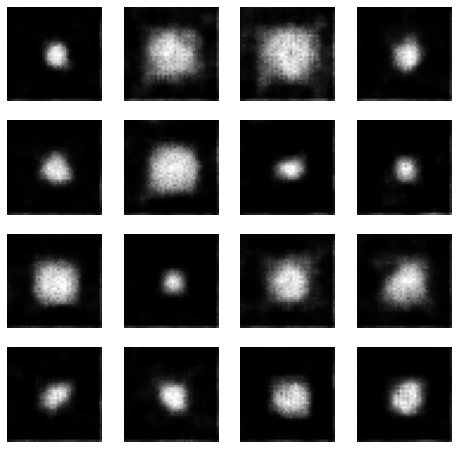

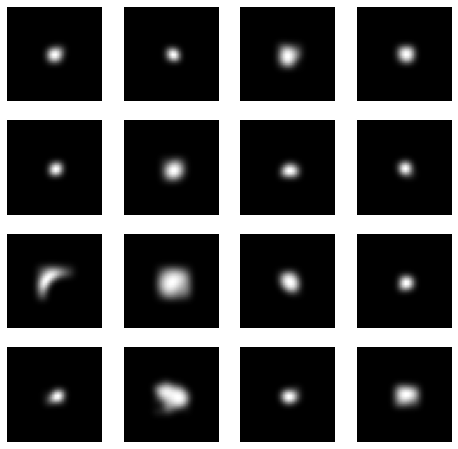

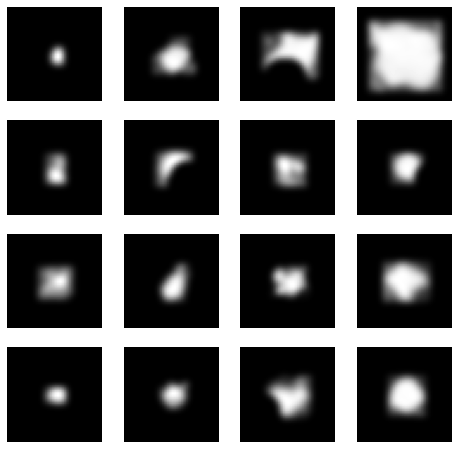

In [6]:
# CapsuleGAN Plot-Part

import matplotlib.pyplot as plt

### plot fake nodules
start = 16 * 300
fake_nodules = fake_set[start:start+16]
fake_nodules = fake_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(fake_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "fake_sample.png")
plt.show()

### plot benign nodules
start = 16 * 2
benign_nodules = benign_set[start:start+16]
benign_nodules = benign_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(benign_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "benign_sample.png")
plt.show()

### plot malignancy nodules
start = 16 * 28
malignancy_nodules = malignancy_set[start:start+16]
malignancy_nodules = malignancy_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(malignancy_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "malignancy_sample.png")
plt.show()

In [7]:
# CapsuleGAN Semi-Part

for i in range(3):
    labeled_num = int(labeled_nums[i] / 2)
    labeled_malignancy = malignancy_set[:labeled_num]
    single_acc = []
    for j in range(5):
        labeled_benign = np.array(random.sample(benign_set.tolist(), labeled_num))
        X = np.concatenate((labeled_benign, labeled_malignancy, fake_set), axis=0)

        X = torch.from_numpy(X)
        X = X.view(-1, 8 * 40 * 40)

        y = [1] * len(X)
        y[:labeled_num] = (0,) * labeled_num
        unlabeled_indices = np.arange(len(y))[labeled_num * 2:]
        X = X.detach().numpy()

        #半监督学习LabelSpreading模型
        y_train=np.copy(y)
        y_train[unlabeled_indices]=-1
        clf=LabelSpreading(max_iter=200,kernel='rbf',gamma=0.65)
        clf.fit(X,y_train)
        ### 获取预测准确率
        predicted_labels = clf.transduction_[unlabeled_indices] # 预测标记
        print(sum(predicted_labels))
        true_labels = np.array(y)[unlabeled_indices] # 真实标记
        acc = metrics.accuracy_score(true_labels,predicted_labels)
        print("Accuracy:%f"%acc)
        single_acc.append(acc)
    print("ACC of %d: %f" % (labeled_num * 2, sum(single_acc) / len(single_acc)))

10216
Accuracy:0.510800
12078
Accuracy:0.603900
11263
Accuracy:0.563150
10197
Accuracy:0.509850
13060
Accuracy:0.653000
ACC of 100: 0.568140
11848
Accuracy:0.592400
9950
Accuracy:0.497500
12411
Accuracy:0.620550
13530
Accuracy:0.676500
12218
Accuracy:0.610900
ACC of 500: 0.599570
13236
Accuracy:0.661800
13210
Accuracy:0.660500
11865
Accuracy:0.593250
11235
Accuracy:0.561750
12296
Accuracy:0.614800
ACC of 1000: 0.618420


In [1]:
# AC-CapsuleGAN Plot-Part

import numpy as np
import torch
import matplotlib.pyplot as plt

INPUT_PATH = "./AC-CapsuleGAN_output/"
OUTPUT_PATH = "./result/AC-CapsuleGAN/"

In [2]:
fake_set = np.load(INPUT_PATH + 'fake.npy')

In [5]:
fake_label_set = np.load('./fake_label.npy',allow_pickle=True)

In [16]:
fake_label = []
for i in range(fake_label_set.shape[0]):
    fake_label.append(fake_label_set[i].tolist())

print(fake_label)

[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 

In [18]:
print(len(fake_label))

np.save("./fake_label_cpu.npy",np.array(fake_label))

32000


In [4]:
fake_label_set = np.load(INPUT_PATH + 'fake_label_cpu.npy')

In [12]:
fake_benign_label = [i for i in range(len(fake_label_set)) if fake_label_set[i] == 0]
fake_maligancy_label = [i for i in range(len(fake_label_set)) if fake_label_set[i] == 1]

fake_benign_nodules = fake_set[fake_benign_label]
fake_maligancy_nodules = fake_set[fake_maligancy_label]

print(fake_benign_nodules.shape, fake_maligancy_nodules.shape)

(15895, 1, 8, 40, 40) (16105, 1, 8, 40, 40)


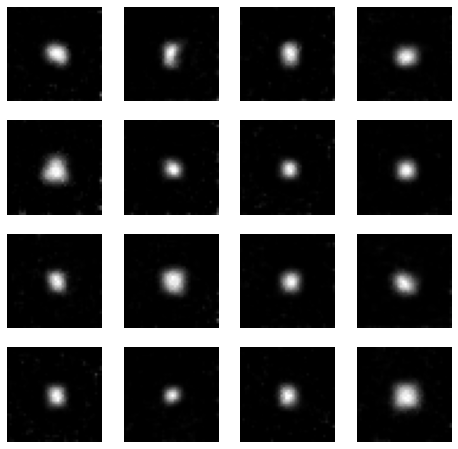

In [20]:
### plot fake benign nodules
start = 16 * 1
fake_benign_sample_nodules = fake_benign_nodules[start:start+16]
fake_maligancy_sample_nodules = fake_maligancy_nodules[start:start+16]
fake_benign_sample_nodules = fake_benign_sample_nodules * 127.5 + 127.5
fake_maligancy_sample_nodules = fake_maligancy_sample_nodules * 127.5 + 127.5
plt.figure(figsize=(8,8))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(fake_benign_sample_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "fake_benign_sample.png")
plt.show()

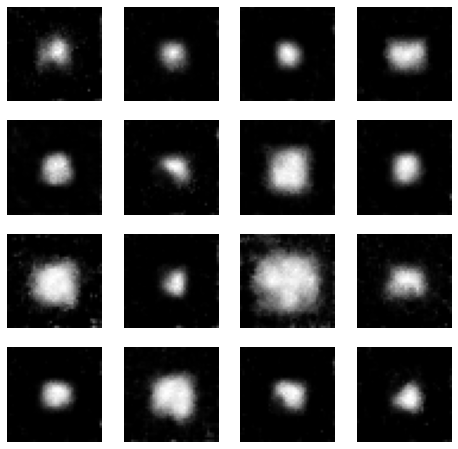

In [21]:
plt.figure(figsize=(8,8))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(fake_maligancy_sample_nodules[i*4+j][0][4], cmap="gray")
        plt.axis("off")
plt.savefig(OUTPUT_PATH + "fake_maligancy_sample.png")
plt.show()

In [1]:
import numpy as np
import torch
from sklearn import metrics
from sklearn import datasets
from sklearn.semi_supervised.label_propagation import LabelSpreading

import random

INPUT_PATH = './AC-CapsuleGAN_output/'
labeled_nums = [100, 500, 1000]

train_set = np.load(INPUT_PATH + "train_set.npy")
test_set = np.load(INPUT_PATH + 'test_set.npy')

train_label = np.load(INPUT_PATH + "train_level.npy")
test_label = np.load(INPUT_PATH + 'test_level.npy')

fake_set = np.load(INPUT_PATH + 'fake.npy')
fake_label_set = np.load(INPUT_PATH + 'fake_label_cpu.npy')

/Users/mac/anaconda3/envs/CapsuleGAN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data_set = np.concatenate((train_set, test_set), axis=0)
data_label = np.concatenate((train_label, test_label), axis=0)
print(data_set.shape)
print(fake_set.shape)

(5307, 1, 8, 40, 40)
(32000, 1, 8, 40, 40)


In [4]:
# AC-CapsuleGAN Semi-Part

for i in range(3):
    labeled_num = labeled_nums[i]
    labeled_nodules = data_set[labeled_num:labeled_num * 2]
    labels = data_label[labeled_num:labeled_num * 2]
    X = np.concatenate((labeled_nodules, fake_set), axis=0)

    X = torch.from_numpy(X)
    X = X.view(-1, 8 * 40 * 40)

    y = np.concatenate((labels, fake_label_set), axis=0)
    y = y.tolist()
    unlabeled_indices = np.arange(len(y))[labeled_num:]
    X = X.detach().numpy()

    #半监督学习LabelSpreading模型
    y_train=np.copy(y)
    y_train[unlabeled_indices]=-1
    clf=LabelSpreading(max_iter=200,kernel='rbf',gamma=0.65)
    clf.fit(X,y_train)
    ### 获取预测准确率
    predicted_labels = clf.transduction_[unlabeled_indices] # 预测标记
    true_labels = np.array(y)[unlabeled_indices] # 真实标记
    acc = metrics.accuracy_score(true_labels,predicted_labels)
    print("ACC of %d: %f" % (labeled_num, acc))

ACC of 100: 0.726969
ACC of 500: 0.768656
ACC of 1000: 0.829937
